In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("steve1215rogg/e-commerce-dataset")

print("Path to dataset files:", path)

100%|██████████| 89.8k/89.8k [00:00<00:00, 561kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/steve1215rogg/e-commerce-dataset/versions/1


In [2]:
import os
import pandas as pd

files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['ecommerce_dataset_updated.csv']


In [3]:
csv_file = os.path.join(path, "ecommerce_dataset_updated.csv")
df = pd.read_csv(csv_file)
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


# Define the Problem Statement
We aim to:

* Analyze sales trends over time to identify patterns.
* Determine the top-performing categories and products.
* Understand customer payment preferences.
* Evaluate the impact of discounts on final sales.

# Data Cleaning and Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [5]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Category,0
Price (Rs.),0
Discount (%),0
Final_Price(Rs.),0
Payment_Method,0
Purchase_Date,0


In [6]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [7]:
# df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

ValueError: time data "27-09-2024" doesn't match format "%m-%d-%Y", at position 4. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [9]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], dayfirst=True)

In [10]:
df['Year'] = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df['Day'] = df['Purchase_Date'].dt.day
df['Day_of_Week'] = df['Purchase_Date'].dt.day_name()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_ID           3660 non-null   object        
 1   Product_ID        3660 non-null   object        
 2   Category          3660 non-null   object        
 3   Price (Rs.)       3660 non-null   float64       
 4   Discount (%)      3660 non-null   int64         
 5   Final_Price(Rs.)  3660 non-null   float64       
 6   Payment_Method    3660 non-null   object        
 7   Purchase_Date     3660 non-null   datetime64[ns]
 8   Year              3660 non-null   int32         
 9   Month             3660 non-null   int32         
 10  Day               3660 non-null   int32         
 11  Day_of_Week       3660 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(5)
memory usage: 300.4+ KB


# Exploratory Data Analysis (EDA)
Tasks:
* Analyze overall sales trends (Final_Price) by time.
* Identify top categories and products by sales.
* Understand payment method distribution.
* Evaluate the impact of discounts.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

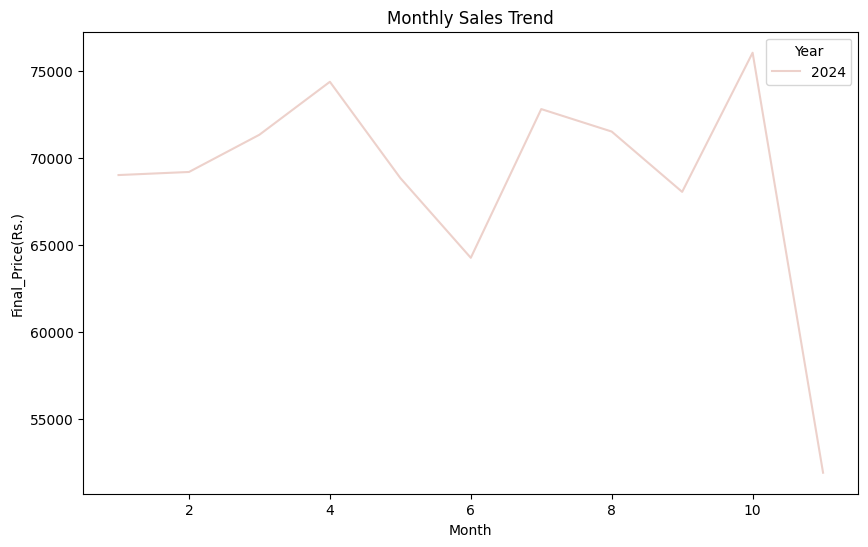

In [13]:
monthly_sales = df.groupby(['Year', 'Month'])['Final_Price(Rs.)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Final_Price(Rs.)', hue='Year')
plt.title('Monthly Sales Trend')
plt.show()

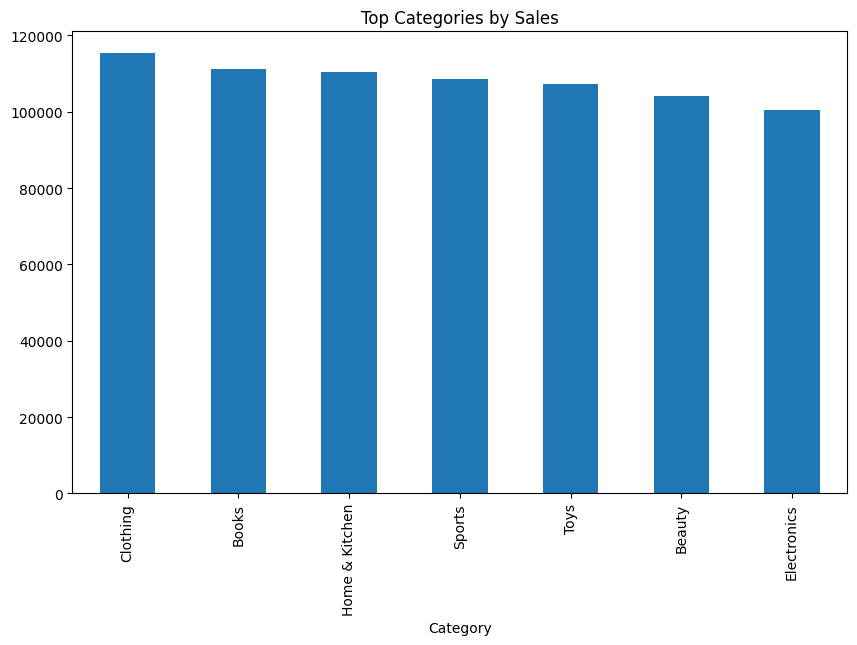

In [14]:
category_sales = df.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)

category_sales.plot(kind='bar', title='Top Categories by Sales', figsize=(10, 6))
plt.show()

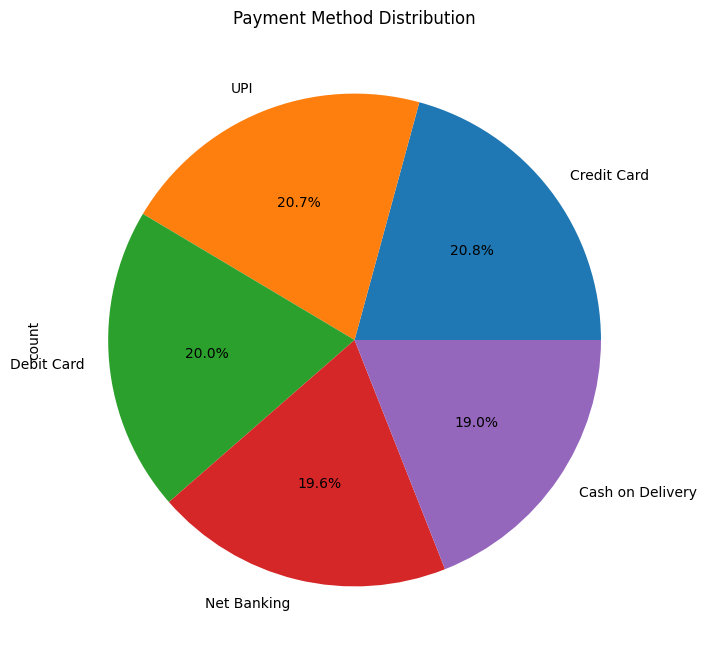

In [15]:
payment_method_counts = df['Payment_Method'].value_counts()

payment_method_counts.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution', figsize=(8, 8))
plt.show()

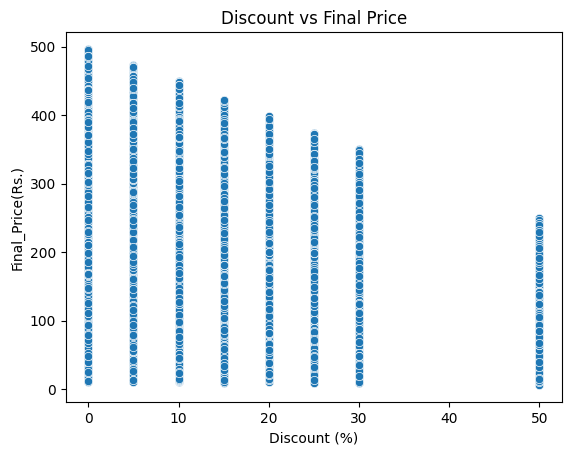

In [16]:
sns.scatterplot(data=df, x='Discount (%)', y='Final_Price(Rs.)')
plt.title('Discount vs Final Price')
plt.show()

# Advanced Analysis
Seasonal Trends
* time series decomposition to analyze trends and seasonality.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_sales_series = df.groupby(['Year', 'Month'])['Final_Price(Rs.)'].sum()
monthly_sales_series.index = pd.to_datetime(monthly_sales_series.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

In [18]:
monthly_sales_series

,Final_Price(Rs.)
2024-01-01,69009.43
2024-02-01,69186.34
2024-03-01,71325.40
2024-04-01,74365.13
2024-05-01,68837.25
2024-06-01,64256.66
2024-07-01,72798.23
2024-08-01,71506.96
2024-09-01,68043.09
2024-10-01,76034.51


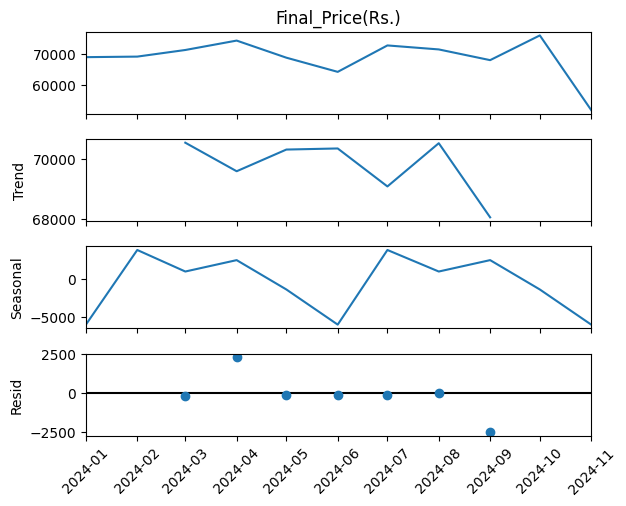

In [19]:
decomposition = seasonal_decompose(monthly_sales_series, model='additive', period=5)
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

Correlation Analysis

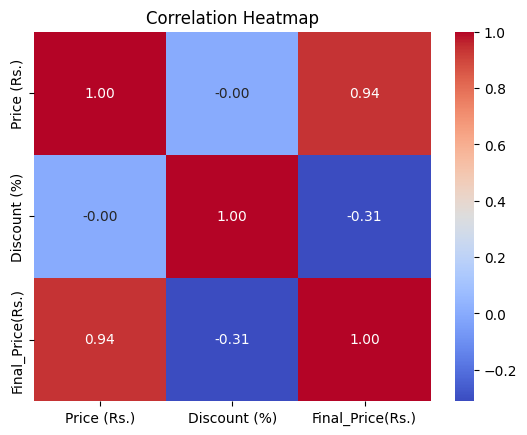

In [20]:
correlation = df[['Price (Rs.)', 'Discount (%)', 'Final_Price(Rs.)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Impact of Discounts on Categories

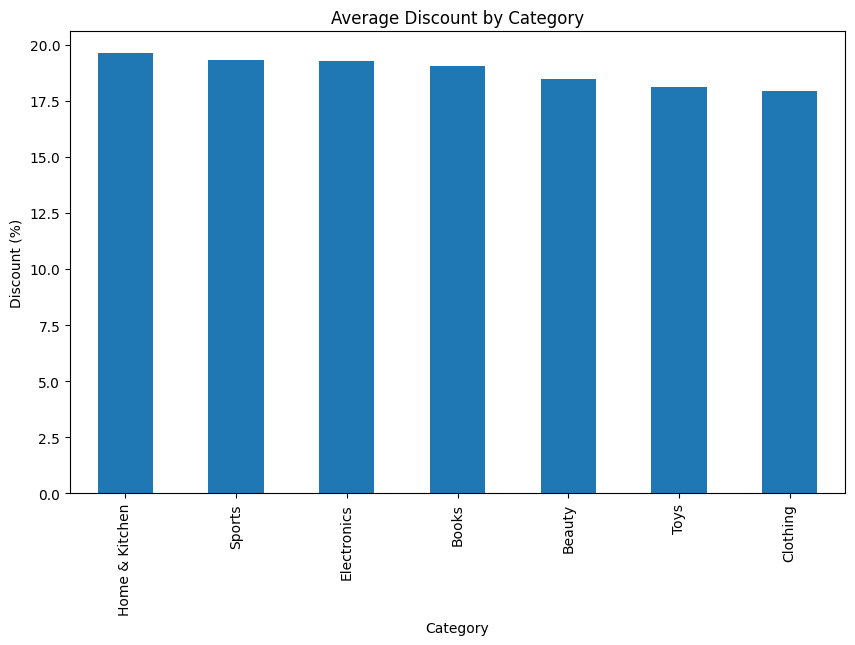

In [21]:
category_discount = df.groupby('Category')['Discount (%)'].mean().sort_values(ascending=False)
category_discount.plot(kind='bar', figsize=(10, 6))
plt.title('Average Discount by Category')
plt.ylabel('Discount (%)')
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales_series, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

In [27]:
forecast

,predicted_mean
2024-12-01,89491.287755
2025-01-01,53877.828910
2025-02-01,86235.815587
2025-03-01,54757.635134
2025-04-01,73203.775133
2025-05-01,72209.993957
2025-06-01,69416.965669
2025-07-01,71031.838343
2025-08-01,66625.803881
2025-09-01,63308.001528


In [28]:
monthly_sales_series

,Final_Price(Rs.)
2024-01-01,69009.43
2024-02-01,69186.34
2024-03-01,71325.40
2024-04-01,74365.13
2024-05-01,68837.25
2024-06-01,64256.66
2024-07-01,72798.23
2024-08-01,71506.96
2024-09-01,68043.09
2024-10-01,76034.51


In [29]:
df.to_csv("/content/sample_data/ecommerce eda data.csv")

In [30]:
from google.colab import files
files.download("/content/sample_data/ecommerce eda data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
monthly_sales_series.to_csv("/content/sample_data/monthly_sales.csv")
files.download("/content/sample_data/monthly_sales.csv")

forecast.to_csv("/content/sample_data/forecast.csv")
files.download("/content/sample_data/forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>